In [3]:
import pandas as pd
with open("negatives_lightcurves_grouped_r_clean.parquet", "rb") as f:
    print(f.read(10))



b'object,oid'


In [4]:
df = pd.read_csv("negatives_lightcurves_grouped_r_clean.parquet")  # still works even if extension is .parquet


In [10]:
import pandas as pd

# Load your parquet file
df = pd.read_csv("negatives_lightcurves_grouped_r_clean.parquet")

# Check shape and columns
print(df_neg.shape)
print(df_neg.columns)


(1471, 27)
Index(['object', 'mean', 'weighted_mean', 'standard_deviation', 'median',
       'amplitude', 'beyond_1_std', 'cusum', 'inter_percentile_range_10',
       'kurtosis', 'linear_trend', 'linear_trend_sigma', 'linear_trend_noise',
       'linear_fit_slope', 'linear_fit_slope_sigma', 'linear_fit_reduced_chi2',
       'magnitude_percentage_ratio_40_5', 'magnitude_percentage_ratio_20_10',
       'maximum_slope', 'median_absolute_deviation',
       'median_buffer_range_percentage_10', 'percent_amplitude',
       'mean_variance', 'anderson_darling_normal', 'chi2', 'skew',
       'stetson_K'],
      dtype='object')


In [7]:
import pandas as pd

# Load your parquet file
df_neg = pd.read_csv("lightcurve_features_26_negative.parquet")

# Check shape and columns
print(df_neg.shape)
print(df_neg.columns)


(1471, 27)
Index(['object', 'mean', 'weighted_mean', 'standard_deviation', 'median',
       'amplitude', 'beyond_1_std', 'cusum', 'inter_percentile_range_10',
       'kurtosis', 'linear_trend', 'linear_trend_sigma', 'linear_trend_noise',
       'linear_fit_slope', 'linear_fit_slope_sigma', 'linear_fit_reduced_chi2',
       'magnitude_percentage_ratio_40_5', 'magnitude_percentage_ratio_20_10',
       'maximum_slope', 'median_absolute_deviation',
       'median_buffer_range_percentage_10', 'percent_amplitude',
       'mean_variance', 'anderson_darling_normal', 'chi2', 'skew',
       'stetson_K'],
      dtype='object')


In [11]:
# Assuming first column is object name / ID
features_neg = df_neg.drop(columns=['object_name'], errors='ignore')


In [12]:
# Automatically select only numeric columns
features_neg_numeric = features_neg.select_dtypes(include='number')



In [13]:
corr = features_neg_numeric.corr()


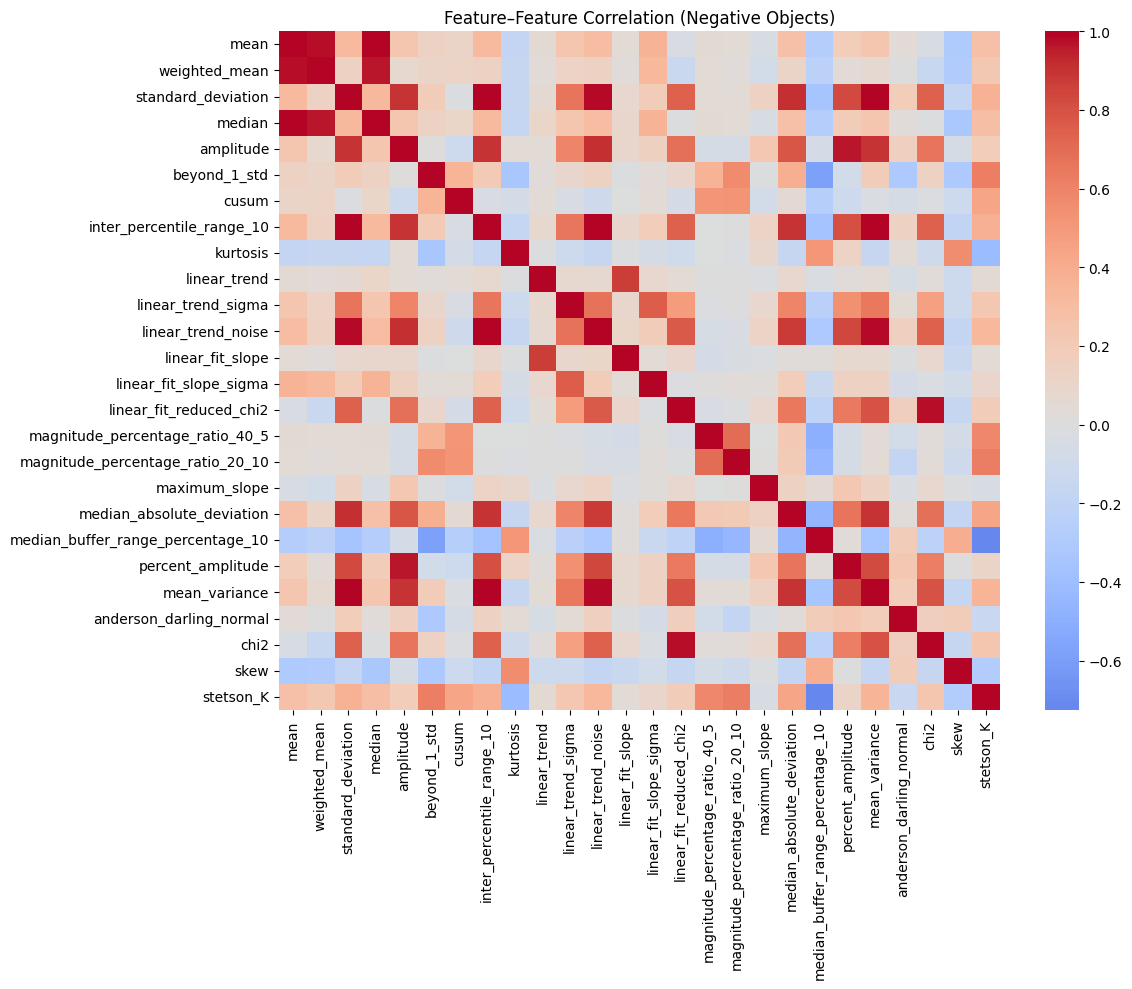

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Feature–Feature Correlation (Negative Objects)')
plt.tight_layout()
plt.show()


In [19]:
import pandas as pd

# Load your parquet file
df_pos= pd.read_csv("lightcurve_features_26.csv")

# Check shape and columns
print(df_pos.shape)
print(df_pos.columns)

(139, 27)
Index(['object', 'mean', 'weighted_mean', 'standard_deviation', 'median',
       'amplitude', 'beyond_1_std', 'cusum', 'inter_percentile_range_10',
       'kurtosis', 'linear_trend', 'linear_trend_sigma', 'linear_trend_noise',
       'linear_fit_slope', 'linear_fit_slope_sigma', 'linear_fit_reduced_chi2',
       'magnitude_percentage_ratio_40_5', 'magnitude_percentage_ratio_20_10',
       'maximum_slope', 'median_absolute_deviation',
       'median_buffer_range_percentage_10', 'percent_amplitude',
       'mean_variance', 'anderson_darling_normal', 'chi2', 'skew',
       'stetson_K'],
      dtype='object')


In [20]:
features_pos = df_pos.drop(columns=['object_name'], errors='ignore')


In [22]:
features_pos_numeric = features_pos.select_dtypes(include='number')


In [25]:
corr = features_pos_numeric.corr()

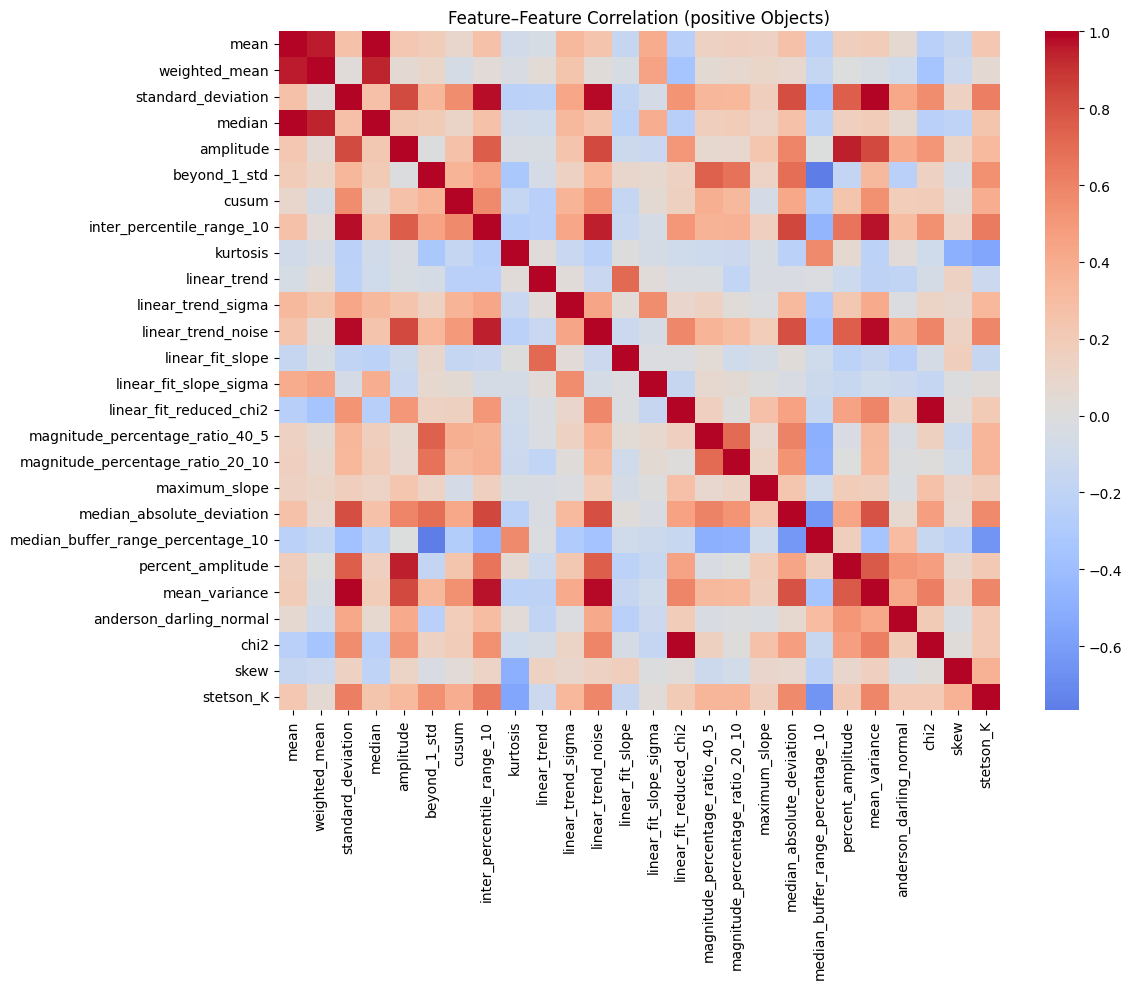

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Feature–Feature Correlation (positive Objects)')
plt.tight_layout()
plt.show()
